In [2]:
import csv
import json
import loans
import zipfile
from io import TextIOWrapper
import csv
import search
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
import numpy as np
import time
import subprocess as sp

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
First_Home_Bank = loans.Bank("First Home Bank")

In [5]:
#What is the average interest rate for the bank?
total_interest_rate = 0
count_interest_rate = 0
for loan in First_Home_Bank:
    if loan.interest_rate != -1:
            total_interest_rate += loan.interest_rate
            count_interest_rate += 1
    if count_interest_rate > 0:
        avg_interest_rate = float(total_interest_rate / count_interest_rate)
    else:
        avg_interest_rate = 0

avg_interest_rate

2.962962962962963

In [6]:
#How many applicants are there per loan, on average?
total_applicants = 0
num_loans = len(First_Home_Bank)

for loan in First_Home_Bank:
    total_applicants += len(loan.applicants)

avg_applicants_per_loan = total_applicants / num_loans

avg_applicants_per_loan

1.5777777777777777

In [7]:
#What is the distribution of ages?
age_distribution = {}

for k in First_Home_Bank:
    for i in range(len(k.applicants)):
        if k.applicants[i].age in age_distribution:
            age_distribution[k.applicants[i].age] += 1
        else:
            age_distribution[k.applicants[i].age] = 1

age_distribution

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [8]:
#How many interest rate values are missing?
bank_tree = search.BST()
for i in First_Home_Bank:
    bank_tree.add(i.interest_rate, i)
len(bank_tree[-1])


18

In [9]:
#How tall is the tree?
bank_tree.height()

9

In [10]:
UWCU = loans.Bank("University of Wisconsin Credit Union")
uwcu_tree = search.BST()

Text(0, 0.5, 'Total Elapsed Milliseconds')

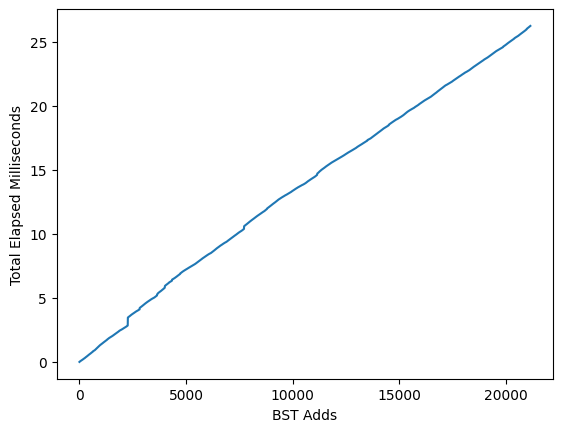

In [11]:
#How long does it take to add the loans to the tree?
time_tree = []
counter = 0

for i in UWCU:
    t0 = time.time()
    uwcu_tree.add(i.interest_rate, i)
    t1 = time.time()
    counter += (t1 - t0) * 1e3
    time_tree.append(counter)


list1 = range(len(UWCU.loans))

    
plt.plot(list1, time_tree)
plt.xlabel("BST Adds")
plt.ylabel("Total Elapsed Milliseconds")



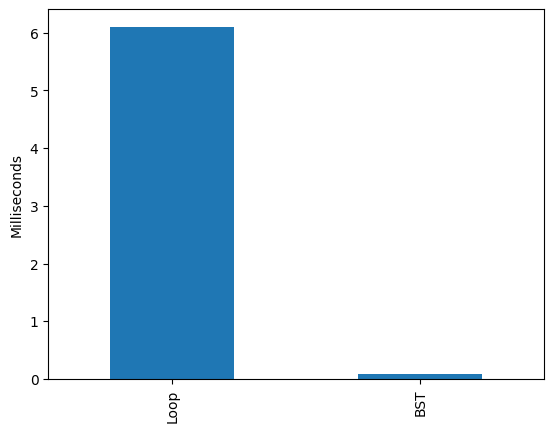

In [12]:
#How fast are tree lookups?

counter1 = 0
for i in UWCU:
    t0 = time.time()
    if loan.interest_rate == -1:
        count_interest_rate += 1
    t1 = time.time()
    counter1 += (t1 - t0) * 1e3
    
loop = counter1
counter2 = 0
t2 = time.time()
list2 = range(len(uwcu_tree[-1]))
t3 = time.time()
counter2 += (t3 - t2) * 1e3
bst = counter2

time_cal = {}
time_cal["Loop"] = loop
time_cal["BST"] = bst


output = pd.Series(time_cal).plot.bar()
plt.ylabel("Milliseconds")
plt.show()

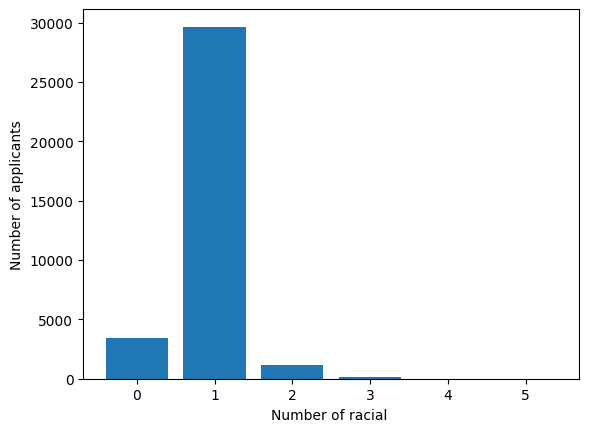

In [13]:
#How many applicants indicate multiple racial identities?

counts = {}

for k in UWCU:
    for j in range(len(k.applicants)):
        num_races = len(k.applicants[j].race)
        if num_races in counts:
            counts[num_races] += 1
        else:
            counts[num_races] = 1
        
plt.bar(counts.keys(), counts.values())
plt.xlabel("Number of racial ")
plt.ylabel("Number of applicants")
plt.show()     

In [14]:
#How many leaf nodes are in the tree?
def getLeafCount(self):
    if self is None:
        return 0
    if(self.left is None and self.right is None):
        return 1
    else:
        return getLeafCount(self.left) + getLeafCount(self.right)
    

getLeafCount(uwcu_tree.root)

9

In [15]:
#What is the third largest interest rate in the Bank BST?
 
tmp = {} 
list2 = []
for k in range(len(UWCU)):
    if UWCU[k].interest_rate in tmp: 
        tmp[UWCU[k].interest_rate] += 1
    else: 
        tmp[UWCU[k].interest_rate] = 1
for r in tmp.keys():
    list2.append(r)

list3 = sorted(list2, reverse=True)
list3[2]


5.99